<a href="https://colab.research.google.com/github/nairaanish/CAT_DOG_CLASSIFIER/blob/master/CAT_DOG_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
#Loading The Data
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin = url, extract = True )

68608000/68606236 [==============================] - 1s 0us/step


In [5]:
#Listing the directories
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  #Cat Train Dir
train_dogs_dir = os.path.join(train_dir, 'dogs')  #Dog Train Dir
validation_cats_dir = os.path.join(validation_dir, 'cats')  #Cat Validation Dir
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  #Dog Validation Dir

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
#Setting Up Our Model
BATCH_SIZE = 100
IMG_SIZE = 150

In [0]:
#Function to plot the images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
#Horizontnal Flip
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 2000 images belonging to 2 classes.


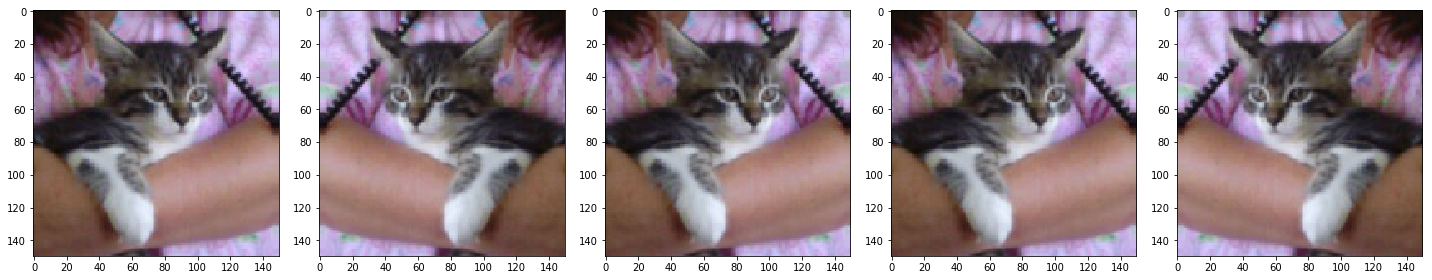

In [12]:
#Printing some flipped images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
#Rotating the images by 45 degrees
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SIZE, IMG_SIZE))

Found 2000 images belonging to 2 classes.


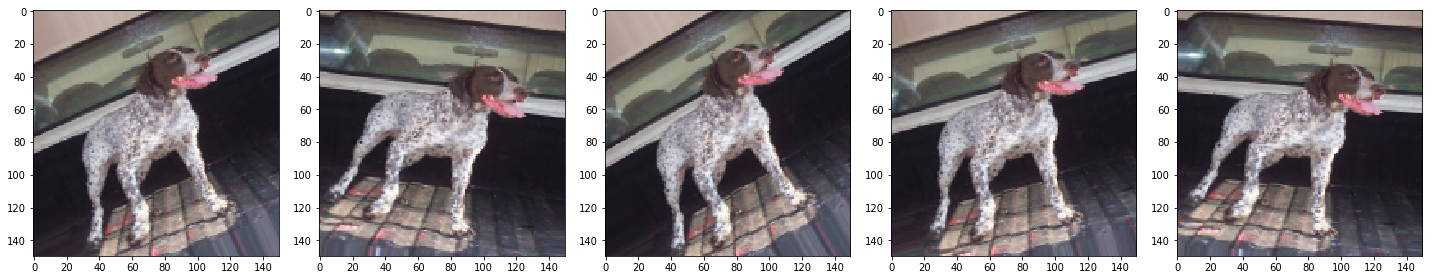

In [17]:
#Printing some rotated images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
#Applying Zoom
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SIZE, IMG_SIZE))


Found 2000 images belonging to 2 classes.


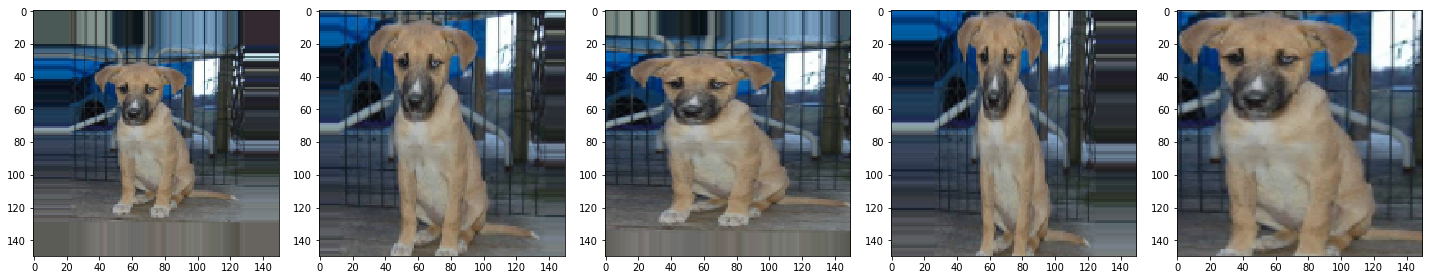

In [21]:
#Printing zoomed images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


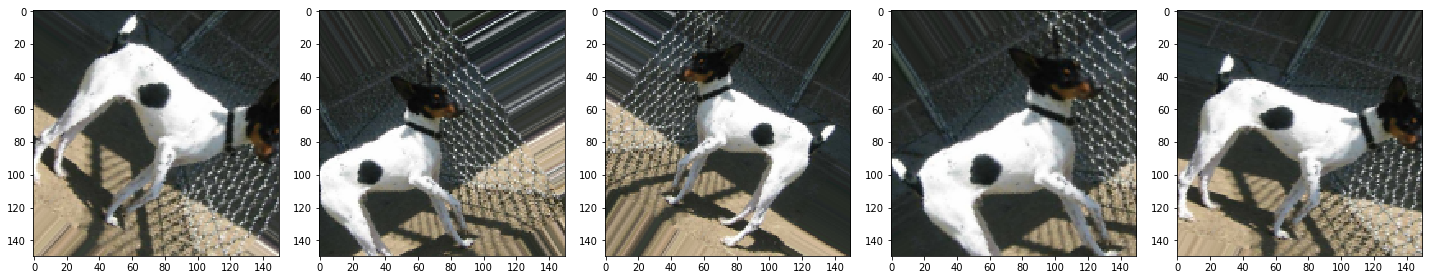

In [24]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [25]:
#Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=validation_dir, 
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
#Creating our model

conv1 = tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = (150,150,3)) #Conv layer1
pool1 = tf.keras.layers.MaxPooling2D(2,2) #Pool layer1

conv2 = tf.keras.layers.Conv2D(64, 3, activation = 'relu') #Conv layer2
pool2 = tf.keras.layers.MaxPooling2D(2,2) #Pool layer2

conv3 = tf.keras.layers.Conv2D(128, 3, activation = 'relu') #Conv layer3
pool3 = tf.keras.layers.MaxPooling2D(2,2) #Pool layer3

conv4 = tf.keras.layers.Conv2D(128, 3, activation = 'relu') #Conv layer4
pool4 = tf.keras.layers.MaxPooling2D(2,2) #Pool layer4

dropout = tf.keras.layers.Dropout(0.5)
flatten = tf.keras.layers.Flatten()
hidden = tf.keras.layers.Dense(512, activation = 'relu')
output = tf.keras.layers.Dense(2, activation = 'softmax')


In [0]:
model = tf.keras.models.Sequential([conv1, pool1, conv2, pool2, conv3, pool3, conv4, pool4, dropout, flatten, hidden, output])

In [0]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       1

In [34]:
#Training the model
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 17s 840ms/step - loss: 0.7250 - acc: 0.5070 - val_loss: 0.6903 - val_acc: 0.5420
Epoch 2/100
20/20 [==============================] - 15s 728ms/step - loss: 0.6892 - acc: 0.5275 - val_loss: 0.6867 - val_acc: 0.5300
Epoch 3/100
20/20 [==============================] - 15s 731ms/step - loss: 0.6765 - acc: 0.5655 - val_loss: 0.6880 - val_acc: 0.5260
Epoch 4/100
20/20 [==============================] - 15s 730ms/step - loss: 0.6566 - acc: 0.6110 - val_loss: 0.6486 - val_acc: 0.5900
Epoch 5/100
20/20 [==============================] - 15s 729ms/step - loss: 0.6474 - acc: 0.6145 - val_loss: 0.6143 - val_acc: 0.6470
Epoch 6/100
20/20 [==============================] - 15s 729ms/step - loss: 0.6402 - acc: 0.6395 - val_loss: 0.6142 - val_acc: 0.6440
Epoch 7/100
20/20 [==============================] - 15s 728ms/step - loss: 0.6318 - acc: 0.6320 - val_loss: 0.6131 - val_acc: 0.6580
Epoch 8/100
20/20 [==============================] - 15s 736ms

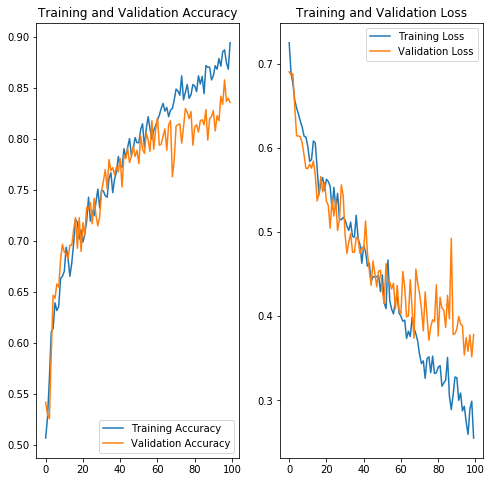

In [35]:
#Visualising results
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()